In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [40]:
data = pd.read_csv('Eleicao.csv', sep=';')
data.head()

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300


In [41]:
data.describe()

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


In [42]:
data.shape

(47, 3)

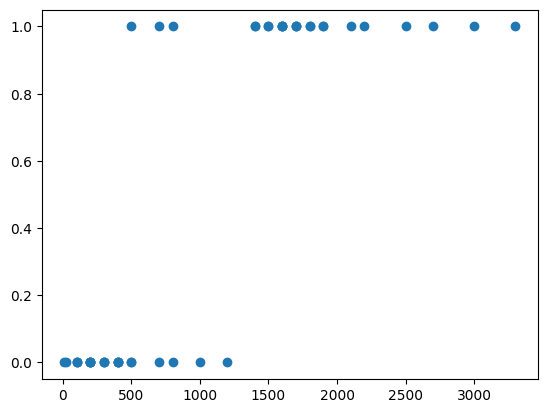

In [43]:
plt.scatter(data.DESPESAS, data.SITUACAO)

## Variaveis Dependentes e Independentes
- Correlação

In [44]:
correlacao = np.corrcoef(data.DESPESAS, data.SITUACAO)
correlacao

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

- Separando Variaveis

In [45]:
# Variavel Independente (DESPESAS)
x = data.iloc[:, 2].values
# x = x.reshape(-1, 1)
# Outra forma de transformação
x = x[:, np.newaxis]

# Variavel Dependente (SITUAÇÂO)
y = data.iloc[:, 1].values

x

array([[  10],
       [ 100],
       [1600],
       [1500],
       [3300],
       [ 200],
       [1800],
       [1700],
       [ 300],
       [1800],
       [ 100],
       [ 500],
       [3000],
       [  20],
       [ 200],
       [ 700],
       [1600],
       [1900],
       [ 100],
       [ 400],
       [2700],
       [ 200],
       [ 300],
       [ 500],
       [2500],
       [1400],
       [ 700],
       [1700],
       [1400],
       [1600],
       [ 400],
       [ 200],
       [1600],
       [2200],
       [1900],
       [ 200],
       [1200],
       [1700],
       [1500],
       [2100],
       [ 400],
       [ 800],
       [ 400],
       [ 500],
       [1000],
       [ 300],
       [ 800]], dtype=int64)

In [46]:
y

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

## Modelo Linear Logístico

In [47]:
modelo = LogisticRegression()
modelo.fit(x, y)
modelo

LogisticRegression()

In [48]:
modelo.intercept_

array([-4.60287217])

In [49]:
modelo.coef_

array([[0.00498364]])

## Gráfico com Linha de Melhor Ajuste
- np.linspace() -> Retorna números com espaçamento uniforme em um intervalo especificado.
- np.exp() -> Retorna a magnitude e a fase do elemento
- .ravel() -> Retornar uma matriz achatada contígua.

### Contigua
Que está em contato com; unido. Que está junto a outra coisa ou a seu lado; que confina com algo; adjacente, confinante, convizinho.

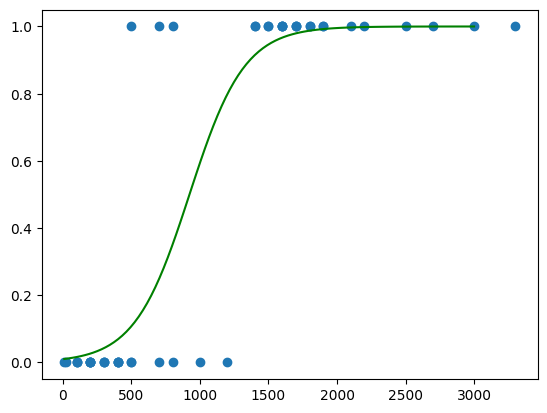

In [50]:
plt.scatter(x, y)

# Novos dados para função sigmoide
x_teste = np.linspace(10, 3000, 100)

# Função sigmoide
def modelo_(x):
    return 1 / (1 + np.exp(-x))

# Gerando Previsões
r = modelo_(x_teste * modelo.coef_ + modelo.intercept_).ravel()

# Completando Gráfico
plt.plot(x_teste, r, color='green')

## Previsões | Novos Candidatos

In [51]:
candidatos = pd.read_csv('NovosCandidatos.csv', sep=';')
candidatos.head()

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900


In [52]:
candidatos.describe()

,DESPESAS
count,7.000000
mean,872.857143
std,1081.429830
min,0.000000
25%,105.000000
50%,500.000000
75%,1200.000000
max,3000.000000


In [53]:
candidatos.shape

(7, 2)

## Despesas dos Novos Candidatos

In [54]:
despesas = candidatos.iloc[:, 1].values
despesas = despesas[:, np.newaxis]
despesas

array([[   0],
       [  10],
       [ 200],
       [ 500],
       [ 900],
       [1500],
       [3000]], dtype=int64)

## Previsões

In [55]:
previsoes = modelo.predict(despesas)
previsoes

array([0, 0, 0, 0, 0, 1, 1], dtype=int64)

## Adicionando Resultados a Base de Dados
- np.column_stack() -> Reúne Colunas

In [56]:
candidatos = np.column_stack((candidatos, previsoes))
candidatos

array([['A', 0, 0],
       ['B', 10, 0],
       ['C', 200, 0],
       ['D', 500, 0],
       ['E', 900, 0],
       ['F', 1500, 1],
       ['G', 3000, 1]], dtype=object)